# ISM Project - ML based Internet Firewall - (F2 Slot - L11+L12)
## Mouhkik Misra - 19BCE2190
## Mohit Suhasaria - 19BCE2167

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import h2o
from h2o.estimators import H2ORandomForestEstimator

In [2]:
df=pd.read_csv('Dataset/log2.csv')

In [3]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [5]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [6]:
d=df.Action.value_counts()
print('Target Frequency')
print(d)

Target Frequency
allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64


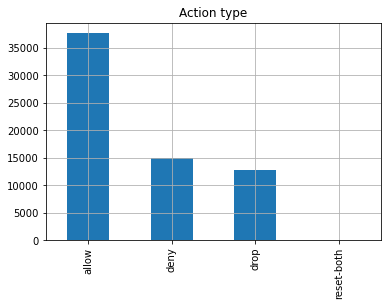

In [7]:
d.plot(kind='bar')
plt.title('Action type')
plt.grid()
plt.show()

### Feature Exploration

In [8]:
num=['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']
def logtrans(x):
    return np.log10(1+x)

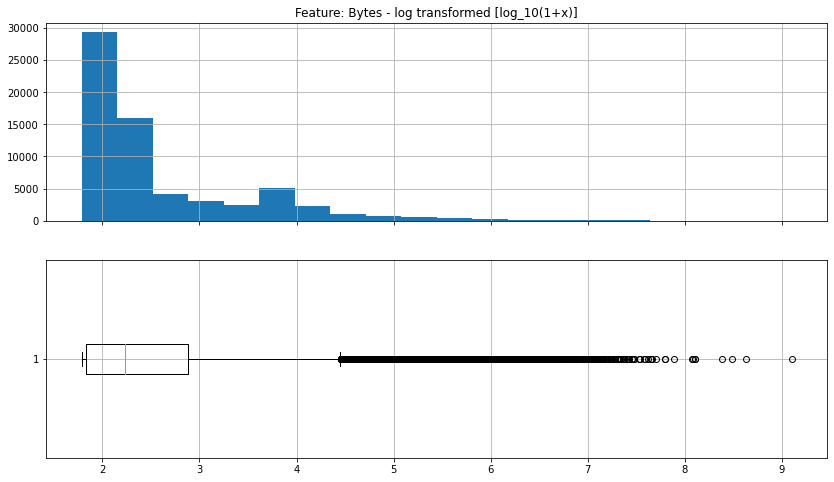

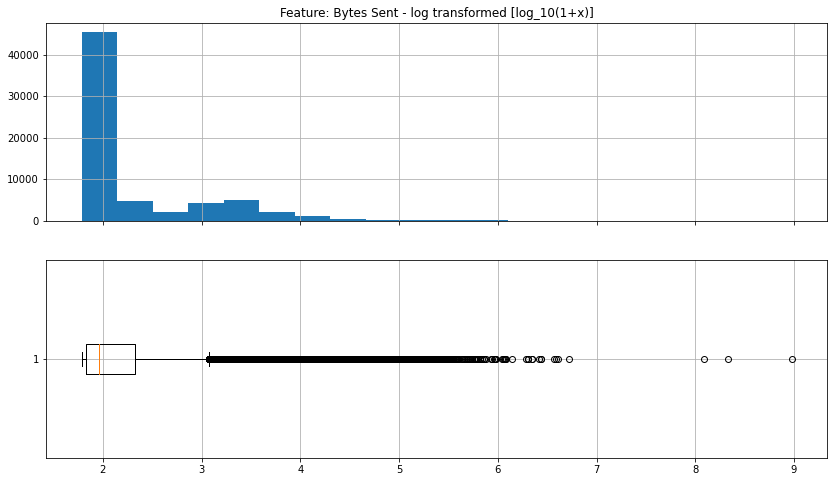

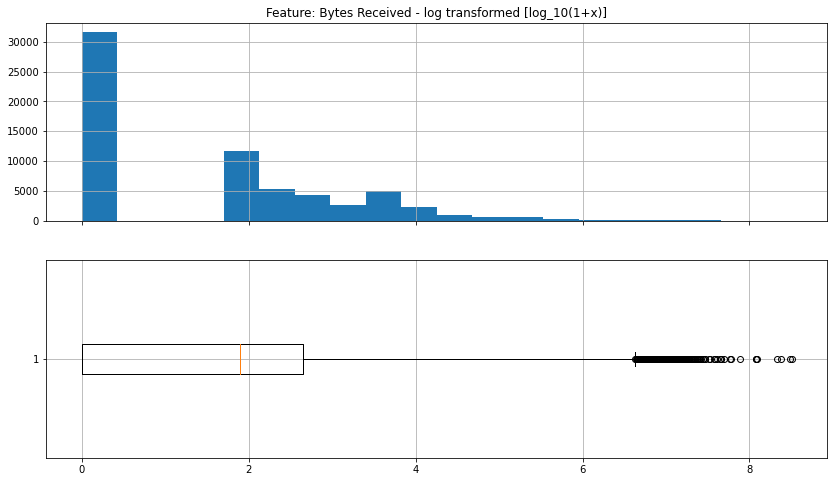

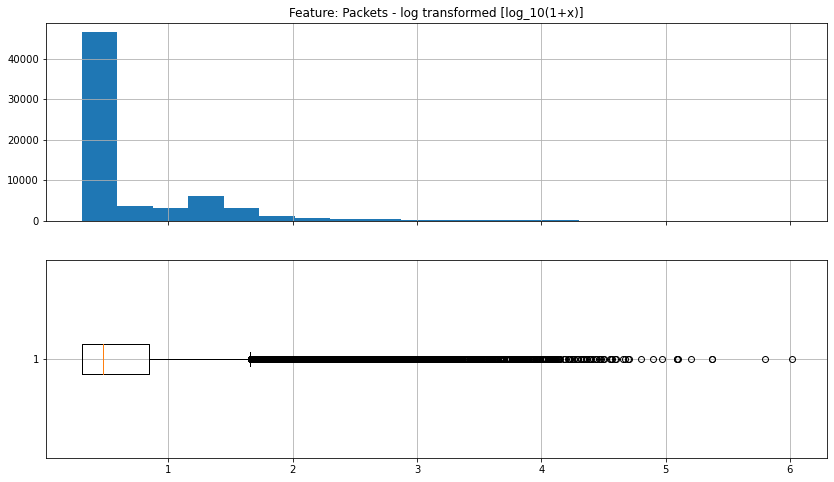

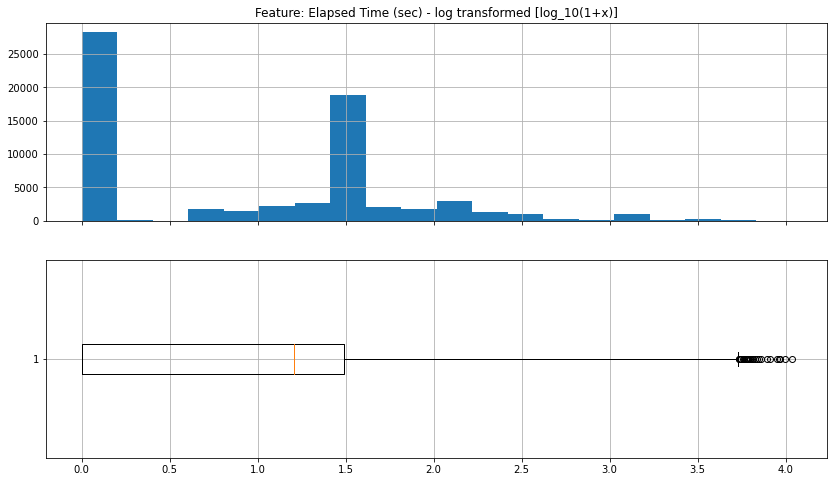

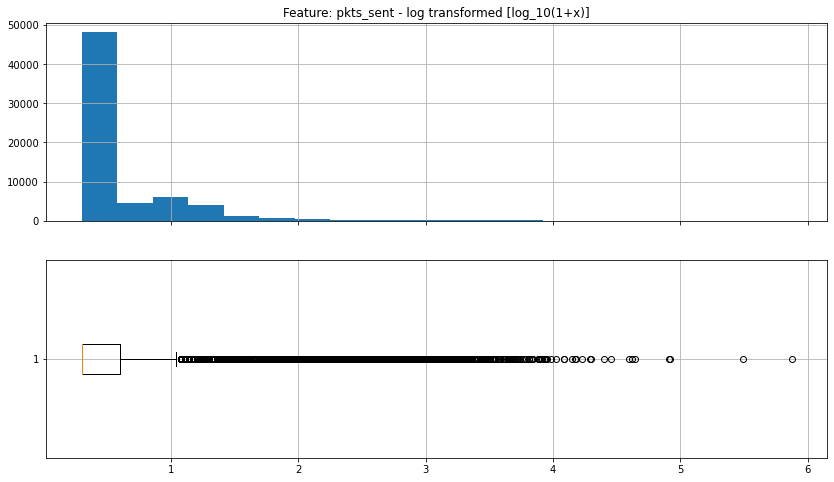

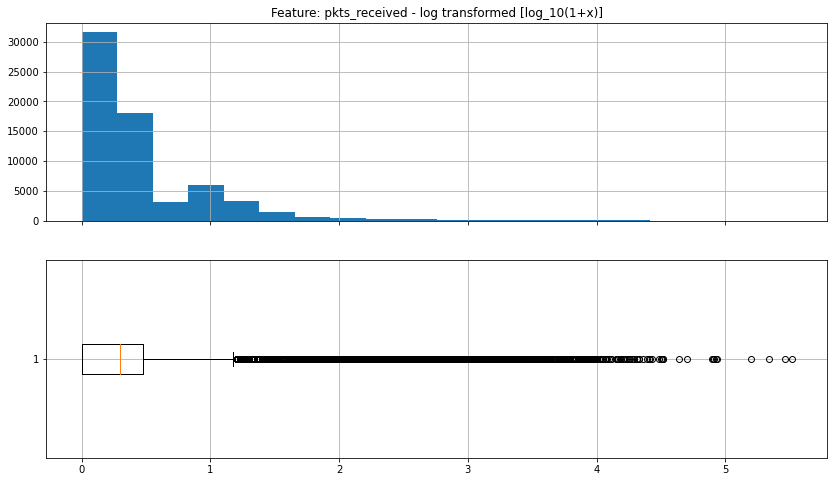

In [9]:
for f in num:
    fig, (ax1,ax2) = plt.subplots(2,1, figsize=(14,8), sharex=True)
    ax1.hist(logtrans(df[f]), bins=20)
    ax1.grid()
    ax1.set_title('Feature: '+f+' - log transformed [log_10(1+x)]')
    ax2.boxplot(logtrans(df[f]), vert=False)
    ax2.grid()
    ax1.set_title('Feature: '+f+' - log transformed [log_10(1+x)]')
    plt.show()

In [10]:
cat= ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']

Feature: Source Port
58638    840
27005    513
443      273
57470    222
49418    210
6881     177
0        173
50584    116
3478     105
26900    102
5588      87
42298     84
48817     82
45941     77
50265     75
16387     73
37965     72
45964     68
1024      67
30960     53
Name: Source Port, dtype: int64



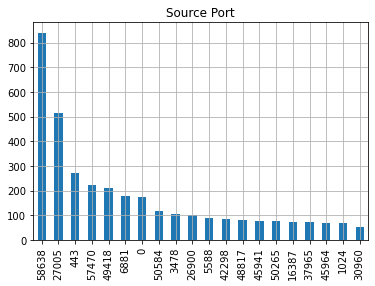

Feature: Destination Port
53       15414
445      12891
443      11684
80        4035
25174     1087
5900       909
37965      826
22114      767
64147      756
50584      717
57470      671
44847      626
35440      428
51505      375
26467      371
23         363
56205      288
30188      265
6881       239
27015      236
Name: Destination Port, dtype: int64



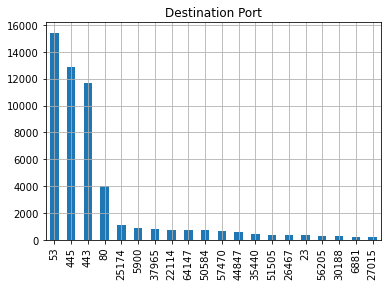

Feature: NAT Source Port
0        28432
48817       83
58638       51
50116       15
7986         5
60868        5
57880        5
30399        5
14591        5
43757        5
57596        5
19443        4
42119        4
64744        4
7897         4
9698         4
28391        4
9177         4
61835        4
61838        4
Name: NAT Source Port, dtype: int64



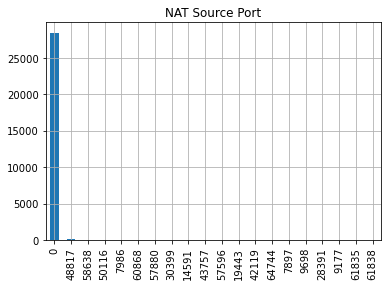

Feature: NAT Destination Port
0        28432
53       15094
443      11678
80        4028
27015      234
27017      160
123        156
3389       156
6881       143
5228       100
7000        94
27016       86
15000       84
5222        71
51413       69
5223        58
5900        55
8999        52
40010       49
22          43
Name: NAT Destination Port, dtype: int64



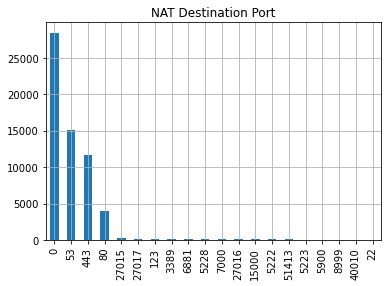

In [11]:
for f in cat:
    print('Feature: '+f)
    print(df[f].value_counts()[0:20])
    print()
    df[f].value_counts()[0:20].plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

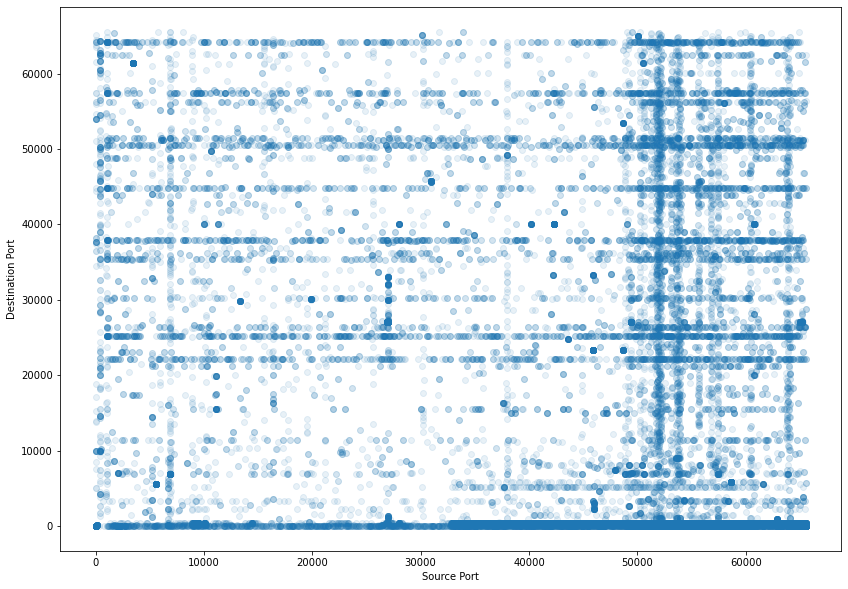

In [12]:
# Source to Destination plot
plt.figure(figsize=(14,10))
plt.scatter(df['Source Port'], df['Destination Port'], alpha=0.1)
plt.xlabel('Source Port')
plt.ylabel('Destination Port')
plt.show()

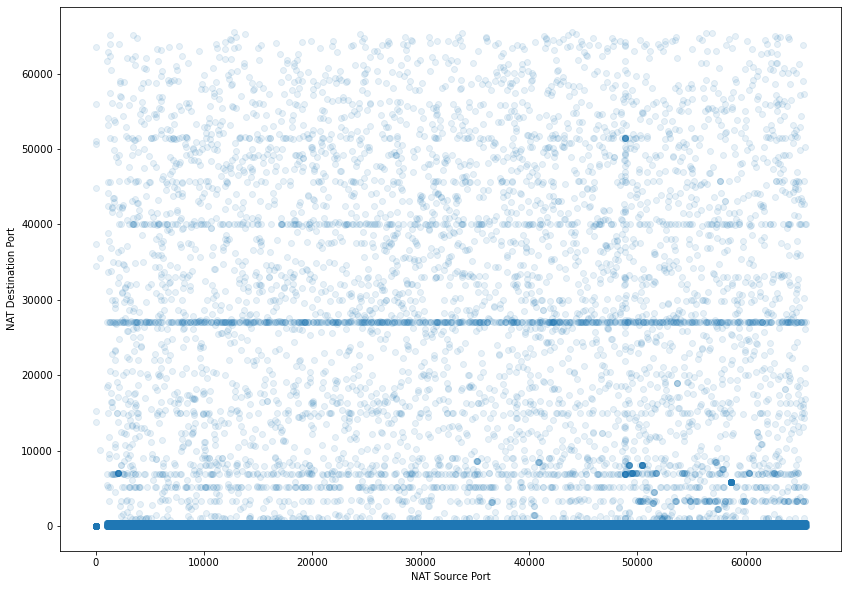

In [13]:
# NAT Source to NAT destination
plt.figure(figsize=(14,10))
plt.scatter(df['NAT Source Port'], df['NAT Destination Port'], alpha=0.1)
plt.xlabel('NAT Source Port')
plt.ylabel('NAT Destination Port')
plt.show()

### Target vs Features

In [14]:
for f in num:
    new_feature=f+'_transformed'
    df[new_feature]=logtrans(df[f])
features_num_transform=[f+'_transformed' for f in num]

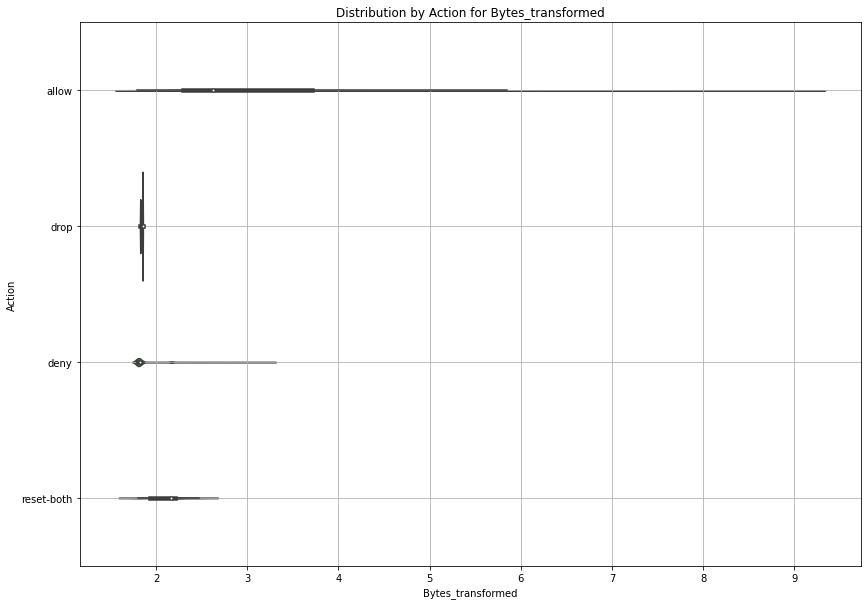

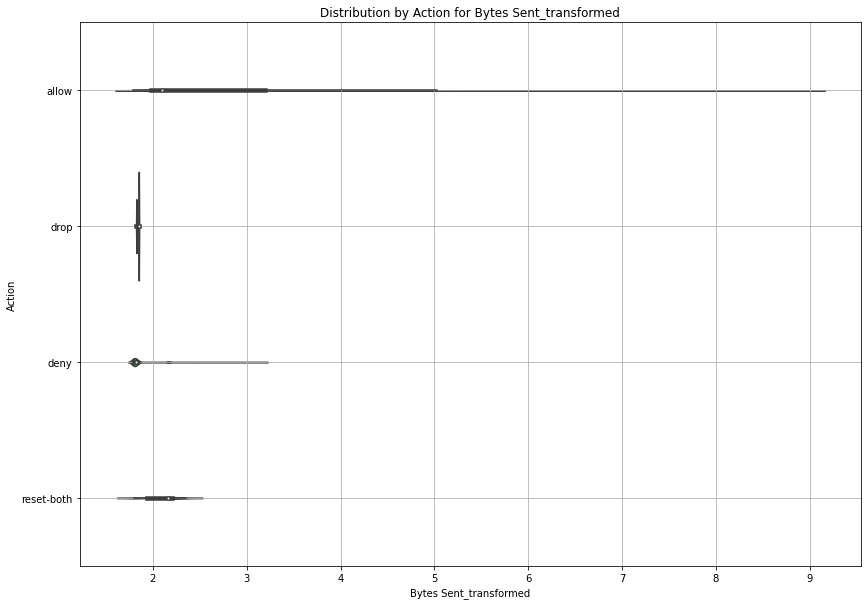

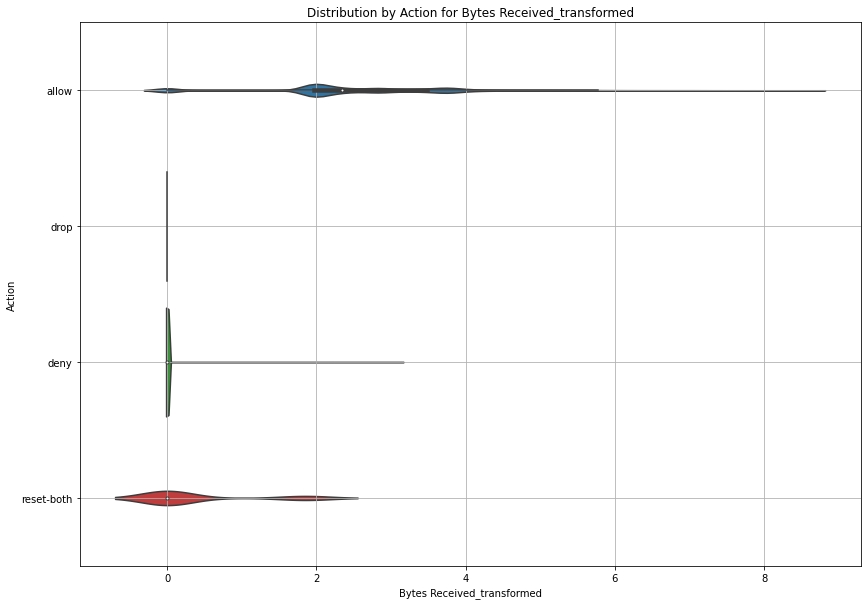

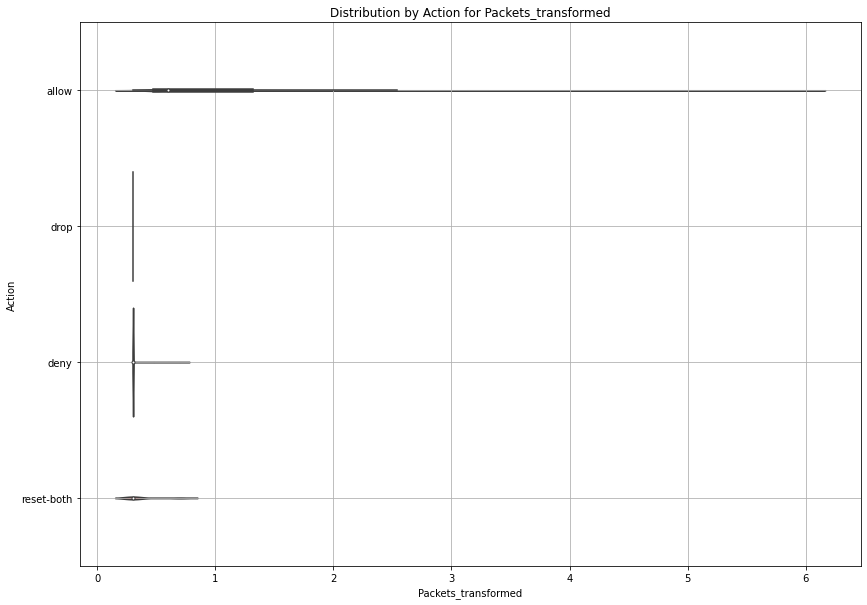

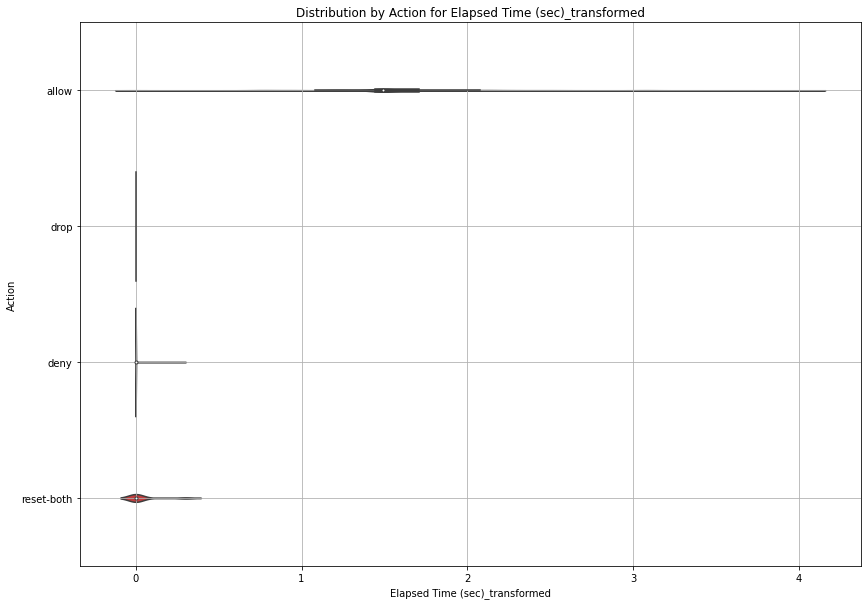

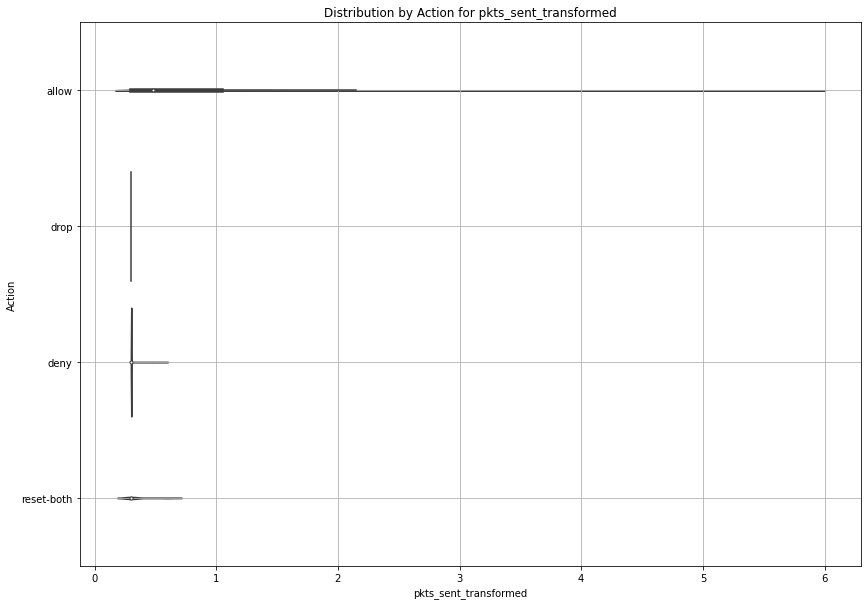

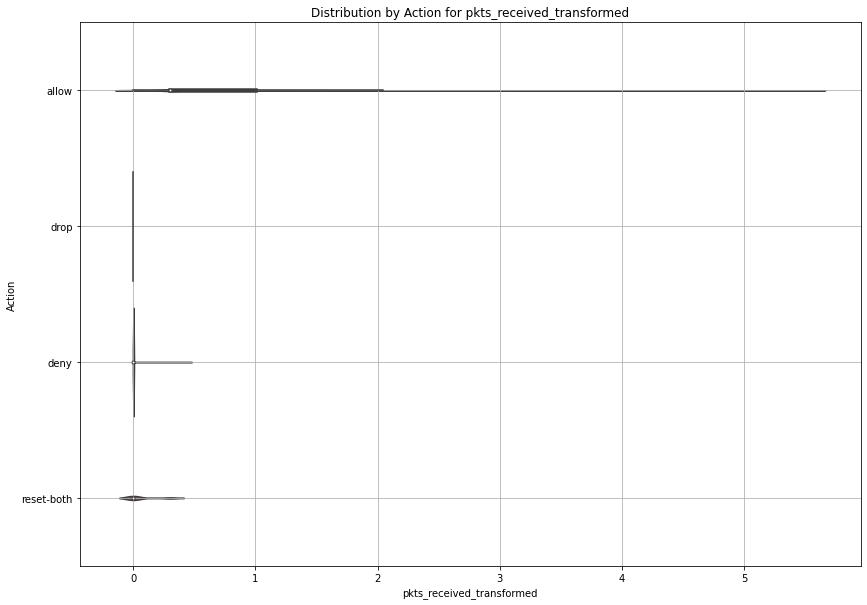

In [15]:
for f in features_num_transform:
    plt.figure(figsize=(14,10))
    sns.violinplot(x=f, y='Action', data=df)
    my_title = 'Distribution by Action for ' + f
    plt.title(my_title)
    plt.grid()

Feature:Source Port - Top 20 levels only


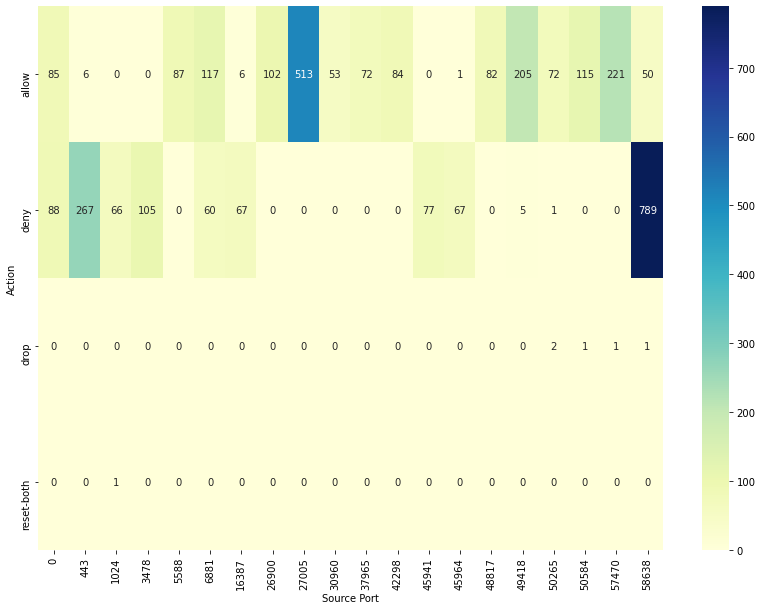

Feature:Destination Port - Top 20 levels only


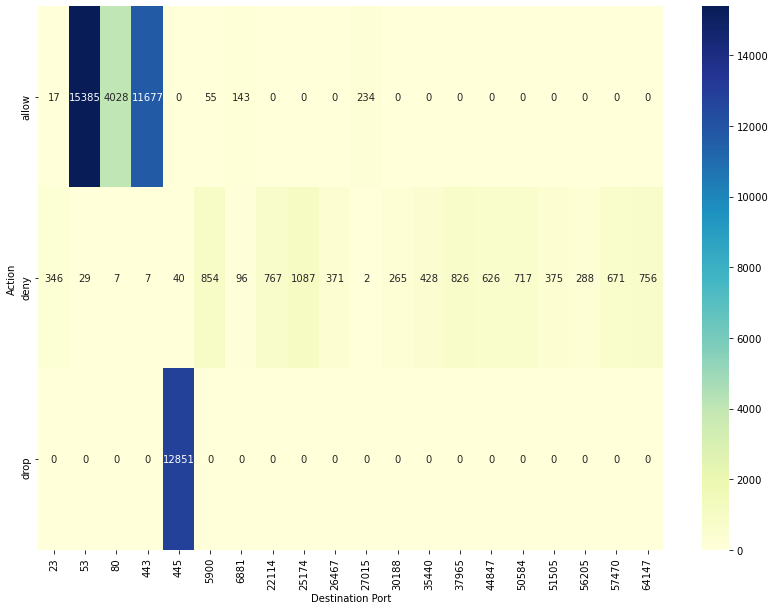

Feature:NAT Source Port - Top 20 levels only


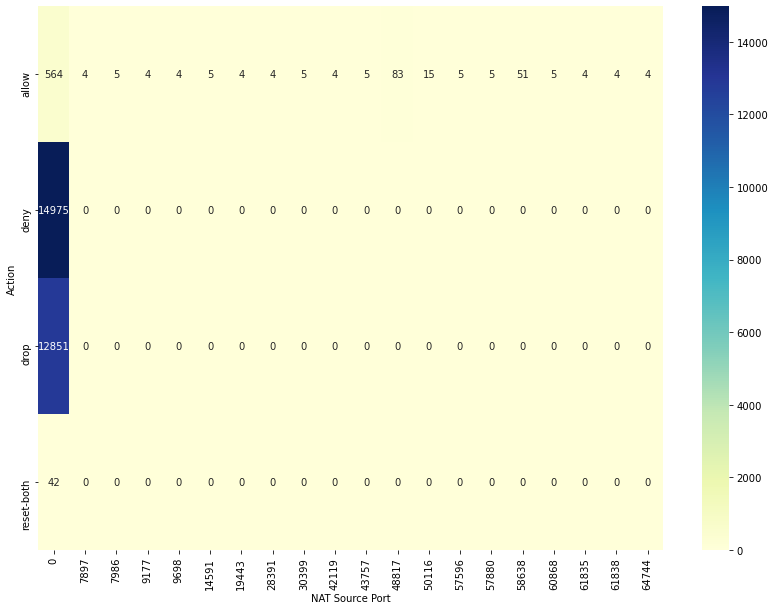

Feature:NAT Destination Port - Top 20 levels only


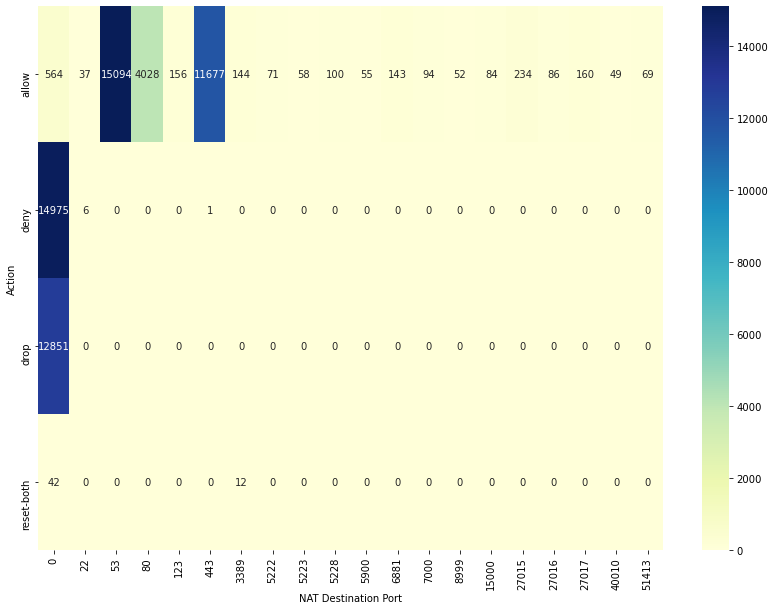

In [16]:
for f in cat:
    level=df[f].value_counts()[0:20].index.to_list()
    df_temp=df[df[f].isin(level)]
    ctab = pd.crosstab(df_temp.Action, df_temp[f])
    print('Feature:' + f + ' - Top 20 levels only')
    plt.figure(figsize=(14,10))
    sns.heatmap(ctab, annot=True, fmt='d', cmap='YlGnBu', linecolor='black')
    plt.show()

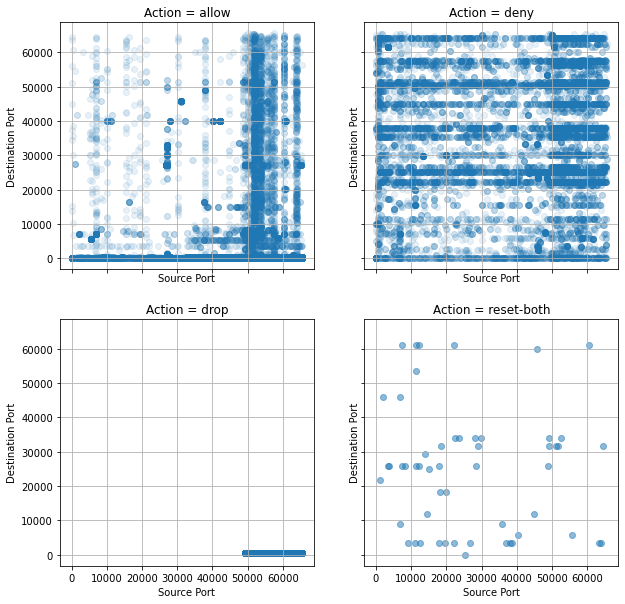

In [17]:
xx = 'Source Port'
yy = 'Destination Port'
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,10))
df_temp = df[df.Action=='allow']
axs[0,0].scatter(df_temp[xx], df_temp[yy], alpha=0.1)
axs[0,0].set_title('Action = allow')
axs[0,0].set_xlabel(xx)
axs[0,0].set_ylabel(yy)
axs[0,0].grid()

df_temp = df[df.Action=='deny']
axs[0,1].scatter(df_temp[xx], df_temp[yy], alpha=0.1)
axs[0,1].set_title('Action = deny')
axs[0,1].set_xlabel(xx)
axs[0,1].set_ylabel(yy)
axs[0,1].grid()

df_temp = df[df.Action=='drop']
axs[1,0].scatter(df_temp[xx], df_temp[yy], alpha=0.5)
axs[1,0].set_title('Action = drop')
axs[1,0].set_xlabel(xx)
axs[1,0].set_ylabel(yy)
axs[1,0].grid()

df_temp = df[df.Action=='reset-both']
axs[1,1].scatter(df_temp[xx], df_temp[yy], alpha=0.5)
axs[1,1].set_title('Action = reset-both')
axs[1,1].set_xlabel(xx)
axs[1,1].set_ylabel(yy)
axs[1,1].grid()

plt.show()

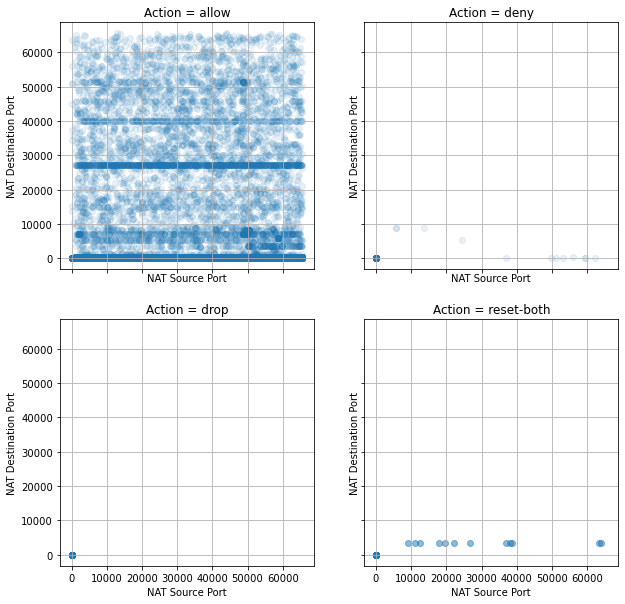

In [18]:
xx = 'NAT Source Port'
yy = 'NAT Destination Port'
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,10))
df_temp = df[df.Action=='allow']
axs[0,0].scatter(df_temp[xx], df_temp[yy], alpha=0.1)
axs[0,0].set_title('Action = allow')
axs[0,0].set_xlabel(xx)
axs[0,0].set_ylabel(yy)
axs[0,0].grid()

df_temp = df[df.Action=='deny']
axs[0,1].scatter(df_temp[xx], df_temp[yy], alpha=0.1)
axs[0,1].set_title('Action = deny')
axs[0,1].set_xlabel(xx)
axs[0,1].set_ylabel(yy)
axs[0,1].grid()

df_temp = df[df.Action=='drop']
axs[1,0].scatter(df_temp[xx], df_temp[yy], alpha=0.5)
axs[1,0].set_title('Action = drop')
axs[1,0].set_xlabel(xx)
axs[1,0].set_ylabel(yy)
axs[1,0].grid()

df_temp = df[df.Action=='reset-both']
axs[1,1].scatter(df_temp[xx], df_temp[yy], alpha=0.5)
axs[1,1].set_title('Action = reset-both')
axs[1,1].set_xlabel(xx)
axs[1,1].set_ylabel(yy)
axs[1,1].grid()

plt.show()

## Random Forest Model

In [19]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 52 mins
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,"14 days, 8 hours and 48 minutes"
H2O_cluster_name:,H2O_from_python_mmouk_nw475r
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.407 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [20]:
t1=time.time()
df_hex=h2o.H2OFrame(df)
t2=time.time()
print('Elapsed time [s]: ', np.round(t2-t1,2))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Elapsed time [s]:  11.78


In [21]:
target = 'Action'
features = features_num_transform + cat
print('Features used:', features)
df_hex[target] = df_hex[target].asfactor()

Features used: ['Bytes_transformed', 'Bytes Sent_transformed', 'Bytes Received_transformed', 'Packets_transformed', 'Elapsed Time (sec)_transformed', 'pkts_sent_transformed', 'pkts_received_transformed', 'Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']


#### Train-Test Split 

In [22]:
train, test=df_hex.split_frame(ratios=[0.75], seed=999)

In [23]:
train[target].as_data_frame().value_counts()

Action    
allow         28186
deny          11274
drop           9645
reset-both       38
dtype: int64

In [24]:
test[target].as_data_frame().value_counts()

Action    
allow         9454
deny          3713
drop          3206
reset-both      16
dtype: int64

In [25]:
cv=5
RF=H2ORandomForestEstimator(ntrees=10, max_depth=30, min_rows=5, 
                            nfolds=cv, score_each_iteration=True, 
                            stopping_metric='logloss',
                            stopping_tolerance=1e-4,
                            seed=999)

t1=time.time()
RF.train(x=features, y=target, training_frame=train)
t2=time.time()
print('Elapsed time [s]: ', np.round(t2-t1,2))  

C:\ProgramData\Anaconda3\lib\site-packages\h2o\estimators\estimator_base.py:208: RuntimeWarning: Stopping metric is ignored for _stopping_rounds=0.
  warnings.warn(mesg["message"], RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\h2o\estimators\estimator_base.py:208: RuntimeWarning: Stopping tolerance is ignored for _stopping_rounds=0.
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Elapsed time [s]:  8.44


In [26]:
RF.cross_validation_metrics_summary()


Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.998129,0.000448,0.998375,0.998674,0.997682,0.997649,0.998263
1,auc,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,err,0.001871,0.000448,0.001625,0.001326,0.002318,0.002351,0.001737
3,err_count,18.400000,4.449719,16.000000,13.000000,23.000000,23.000000,17.000000
4,logloss,0.044462,0.004302,0.046043,0.046080,0.040268,0.049999,0.039918
5,max_per_class_error,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,mean_per_class_accuracy,0.748949,0.000330,0.749356,0.749211,0.748574,0.748707,0.748896
7,mean_per_class_error,0.251051,0.000330,0.250644,0.250789,0.251426,0.251293,0.251104
8,mse,0.006887,0.001044,0.007462,0.007576,0.005592,0.007872,0.005934
9,pr_auc,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


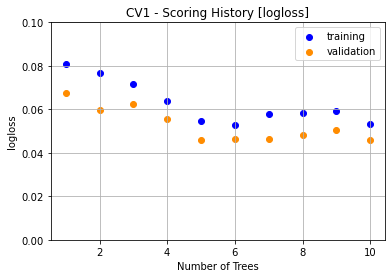

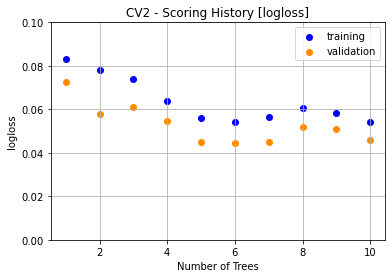

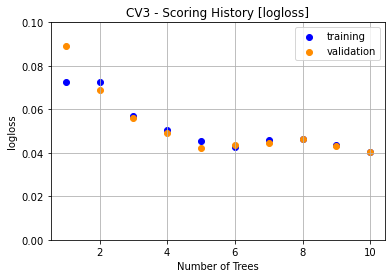

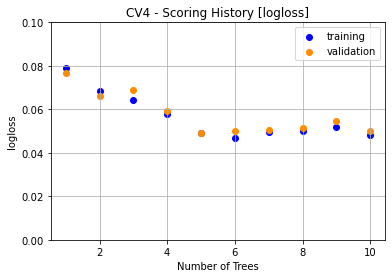

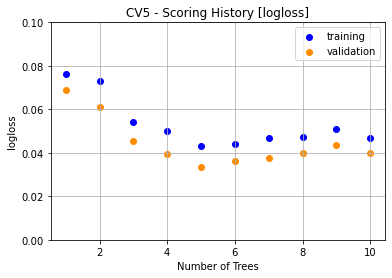

In [27]:
for i in range(cv):
    model=RF.cross_validation_models()[i]
    scores=model.score_history()
    title='CV'+str(1+i)+ ' - Scoring History [logloss]'
    plt.scatter(scores.number_of_trees,
               y=scores.training_logloss,
               c='blue', label='training')
    plt.scatter(scores.number_of_trees,
               y=scores.validation_logloss,
               c='darkorange', label='validation')
    plt.title(title)
    plt.xlabel('Number of Trees')
    plt.ylabel('logloss')
    plt.ylim(0,0.1)
    plt.legend()
    plt.grid()
    plt.show()    

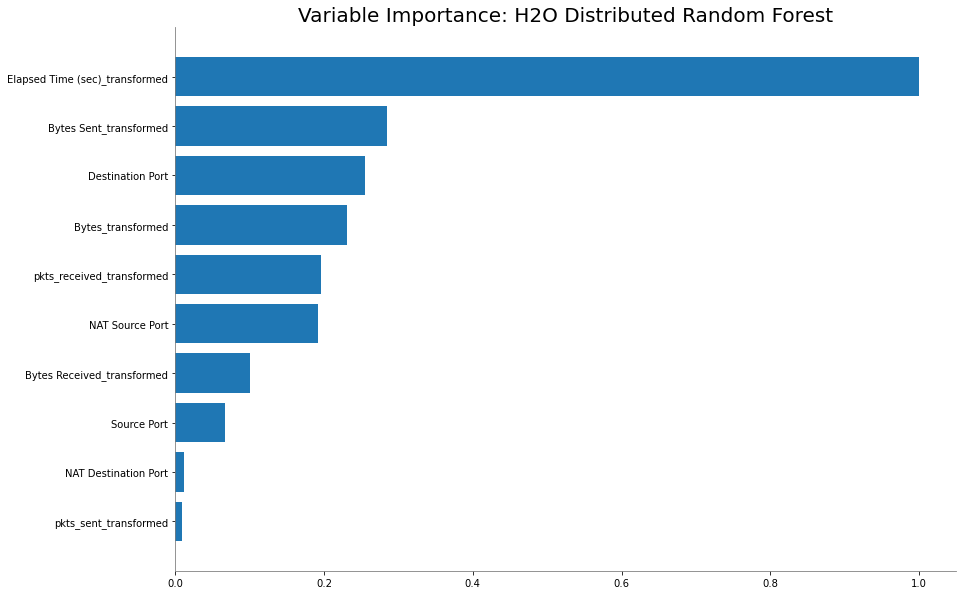

<Figure size 432x288 with 0 Axes>

In [28]:
RF.varimp_plot()

In [29]:
#Performance on Train Set
predict=RF.predict(train)
predict['target']=train[target]
predict=predict.as_data_frame()
predict.head()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,predict,allow,deny,drop,reset-both,target
0,allow,0.999993,0.000007,0.0,0.0,allow
1,allow,0.999993,0.000007,0.0,0.0,allow
2,allow,0.999993,0.000007,0.0,0.0,allow
3,allow,0.999993,0.000007,0.0,0.0,allow
4,allow,0.999993,0.000007,0.0,0.0,allow


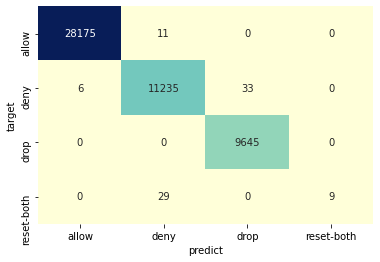

In [30]:
cm=pd.crosstab(predict['target'], predict['predict'])
sns.heatmap(cm, cmap='YlGnBu', annot=True, cbar=False, fmt='d')
plt.show()

In [31]:
#Performance on Test Set
predict=RF.predict(test)
predict['target']=test[target]
predict=predict.as_data_frame()
predict.head()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,predict,allow,deny,drop,reset-both,target
0,allow,0.999993,0.000007,0.0,0.0,allow
1,allow,0.999993,0.000007,0.0,0.0,allow
2,allow,0.999992,0.000008,0.0,0.0,allow
3,allow,0.999993,0.000007,0.0,0.0,allow
4,allow,0.999993,0.000007,0.0,0.0,allow


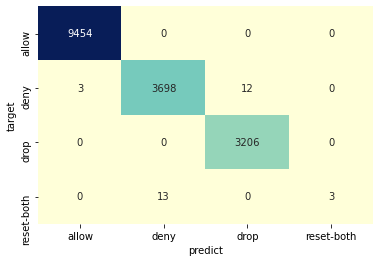

In [32]:
cm=pd.crosstab(predict['target'], predict['predict'])
sns.heatmap(cm, cmap='YlGnBu', annot=True, cbar=False, fmt='d')
plt.show()

## Threat Prediction

In [3]:
df=pd.read_json("Dataset/complete_clean.json", 'records')

<ipython-input-3-e863b136200d>:1: FutureWarning: Starting with Pandas version 2.0 all arguments of read_json except for the argument 'path_or_buf' will be keyword-only
  df=pd.read_json("Dataset/complete_clean.json", 'records')


In [8]:
df

,pattern,type
0,crteyreti=wsn&et3tf6shov=tdsviee y fum$oh3;ore...,valid
1,*;q=0.7,valid
2,nhgiopie/7.8.4.7.0,valid
3,/dyylkl.xd9cpu/4ot0ta/ts6xnrp1/hssh/a2cuerht/s...,valid
4,/2m6vlb1r37jspc/cwvv/mbar/oqrd0/msc/etceebwgi/...,valid
...,...,...
90248,<img onpointerenter=alert(1)>xss</img>,xss
90249,"<source onbeforepaste=""alert(1)"" contenteditab...",xss
90250,"<div draggable=""true"" contenteditable>drag me<...",xss
90251,"<li><cite id=""citerefdomingos2015"" class=""cita...",valid


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90253 entries, 0 to 90252
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pattern  90253 non-null  object
 1   type     90253 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [10]:
df.describe()

,pattern,type
count,90253,90253
unique,81158,5
top,*,valid
freq,1285,60623


In [11]:
count=df['type'].value_counts()
count

valid             60623
sqli              13153
xss                9730
cmdi               3461
path-traversal     3286
Name: type, dtype: int64

<AxesSubplot:>

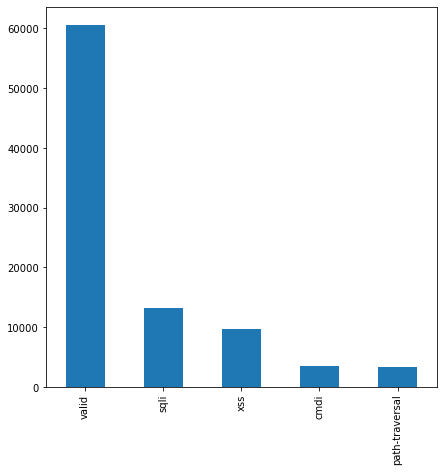

In [12]:
count.plot.bar(figsize=(7,7))

In [13]:
X=df['pattern'].to_numpy().astype(str)
y=df['type'].to_numpy().astype(str)
print(len(X))
print(len(y))

90253
90253


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

In [15]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [16]:
pipe = make_pipeline(TfidfVectorizer(input = 'content', lowercase = True, analyzer = 'char', max_features = 1024), SVC())
pipe

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char', max_features=1024)),
                ('svc', SVC())])

In [17]:
param_grid = {'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 4)], 'svc__C': [1, 10], 'svc__kernel': ['linear', 'rbf']}
grid=GridSearchCV(pipe, param_grid, cv=2, verbose=4)
grid.fit(trainX,trainY)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1);, score=0.959 total time= 1.2min
[CV 2/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1);, score=0.960 total time= 1.1min
[CV 1/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 2);, score=0.985 total time= 2.8min
[CV 2/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 2);, score=0.986 total time= 2.7min
[CV 1/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 4);, score=0.986 total time= 2.5min
[CV 2/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 4);, score=0.987 total time= 2.6min
[CV 1/2] END svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 1);, score=0.982 total time=  42.5s
[CV 2/2] END svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 1);, score=0.983 total time=  42.5s
[CV 1/2] END svc__C=1, svc__kernel=rbf, tfidfvect

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(analyzer='char',
                                                        max_features=1024)),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [1, 10], 'svc__kernel': ['linear', 'rbf'],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (1, 4)]},
             verbose=4)

In [18]:
grid.score(testX,testY)

0.995789753589789

In [19]:
pred=grid.predict(testX)
print(classification_report(testY,pred, digits=4))

                precision    recall  f1-score   support

          cmdi     0.9860    0.9757    0.9808       865
path-traversal     0.9950    0.9745    0.9846       822
          sqli     0.9972    0.9894    0.9933      3288
         valid     0.9955    0.9993    0.9974     15156
           xss     0.9992    0.9967    0.9979      2433

      accuracy                         0.9958     22564
     macro avg     0.9946    0.9871    0.9908     22564
  weighted avg     0.9958    0.9958    0.9958     22564



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


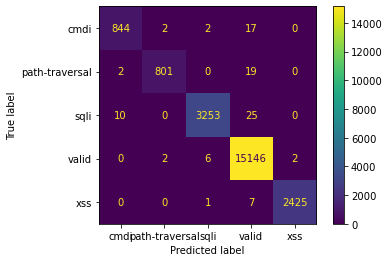

In [20]:
plot_confusion_matrix(grid,testX,testY)

In [21]:
grid.best_params_

{'svc__C': 10, 'svc__kernel': 'rbf', 'tfidfvectorizer__ngram_range': (1, 2)}